### [ 4장 연속형 확률 변수 ]  
교재 7장
1) 1차원 연속형 확률 변수
2) 2차원 연속형 확률 변수

In [2]:
# 0. 준비
import numpy as np
import matplotlib.pyplot as plt

%precision %.3f
%matplotlib inline

from scipy import integrate
import warnings
# 적분 경고는 미출력
warnings.filterwarnings('ignore', category=integrate.IntegrationWarning)

In [ ]:
# [ 1. 1차원 연속형 확률 변수 ]
# 1) 연속적인 확률 변수 표현
# 2) 확률 밀도 함수
#   : f(x) = 2x (0 <= x <= 1)
x_range = np.array([0.0, 1.0]

def f(x):
    return 2*x if x_range[0] <= x <= x_range[1] else 0

X = [x_range, f]

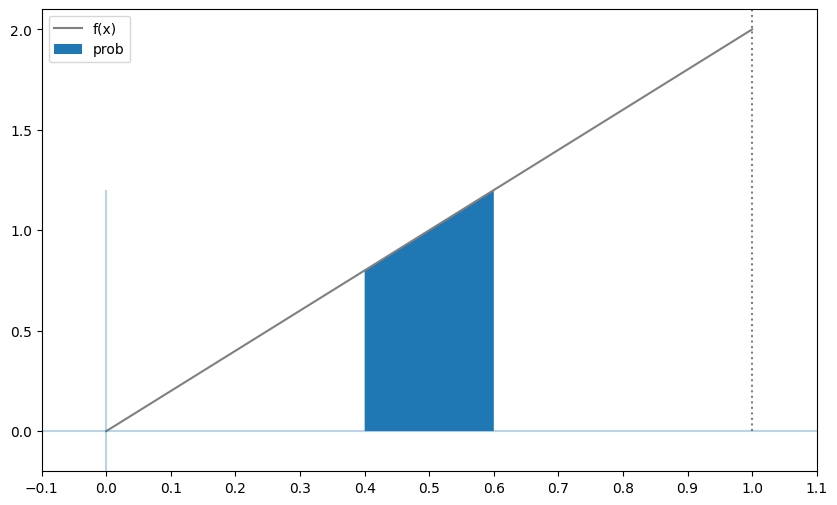

In [36]:
# 확률 밀도 함수 그리기
xs = np.linspace(x_range[0], x_range[1], 100)
fig = plt.figure(figsize=(10, 6))
ax= fig.add_subplot(1,1,1)

ax.plot(xs, [f(x) for x in xs], color='gray', label='f(x)')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4 ~ 0.6 좌표 준비
xs = np.linspace(0.4, 0.6, 100)
# xs 범위로 f(x)와 x축으로 둘러쌓인 영역에 색을 적용
ax.fill_between(xs, [f(x) for x in xs], 0, label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()
plt.show()

In [37]:
integrate.quad(f, 0.4, 0.6) # 피적분함수, 적분 범위 ( , )
# 해당 넓이 : 0.20

(0.200, 0.000)

In [38]:
# 3) 확률의 성질 : 양수, 총합 1
integrate.quad(f, -np.inf, np.inf)

(1.000, 0.000)

In [39]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)    # 0 ~ 1 의 최소값 0 = res
res.fun # 함수의 최소값을 fun이라는 인스턴스 변수에 저장

0

In [40]:
# 4) 누적 분포 함수
#   : 적분 활용
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [41]:
F(0.6) - F(0.4)

0.200

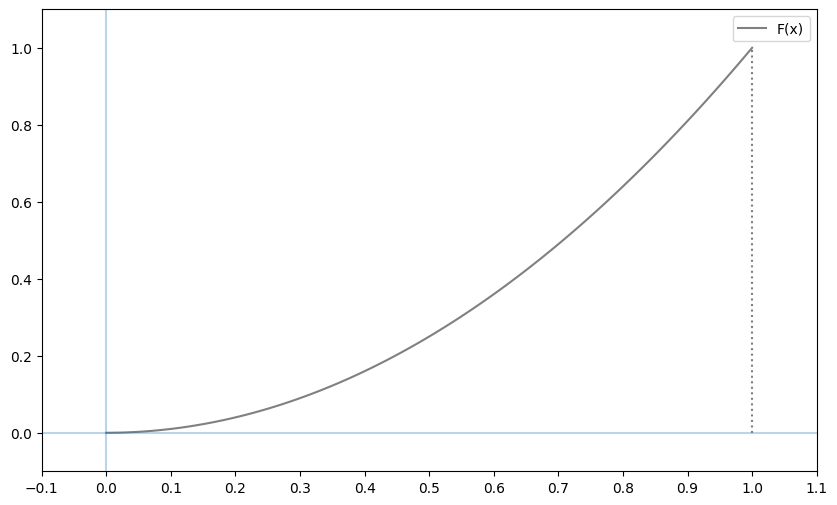

In [42]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
# F(x) 함수의 그래프 표현
ax.plot(xs, [F(x) for x in xs], color='gray', label='F(x)')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()
plt.show()

In [44]:
# 5) 확률 변수의 변환
#   : X가 연속형 확률 변수
#     Y = 2X+3 으로 연속형 확률 변수

#     Y의 확률 밀도 함수 g(y)
#     : g(y) = (y-3)/2    (3 <= y <= 5)

#    확률 분포함수 G(y)
#     : G(y) = integrate(g(y))

y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y-3)/2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

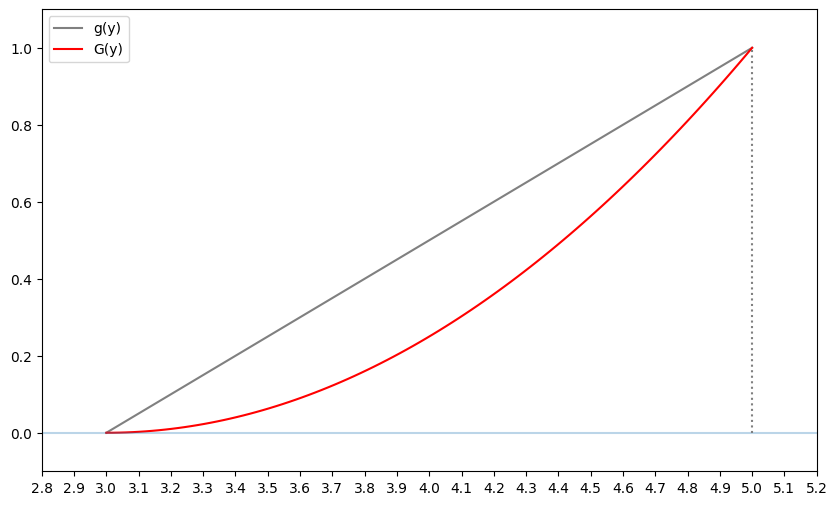

In [45]:
# 6) 이를 활용한 확률 밀도 함수와 확률 분포 함수
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys], color='gray', label='g(y)')
ax.plot(ys, [G(y) for y in ys], color='red', label='G(y)')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.3, 0.1))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()
plt.show()

In [7]:
# [1-2. 1차원 연속형 확률 변수의 지표 ]
# (1) 기댓값


# (2) 분산



### [ 2. 2차원 연속형 확률 변수 ]

In [11]:
# 1) 결합 확률 밀도 함수
#   : 2차원 연속형 확률 변수 (X, Y) 에서
#     X, Y 각자의 확률 조건을 판단할 때
#    -> x, y축 각각 적분

# 예) 불공정한 룰렛 
#   : 5장의 불공정 룰렛 A, B
#   : A+B=X, A=Y 로 가정
#     A
#     {0 <= X <= 2, 0 <= Y <= 1}
#     
#     f(x, y) = 4y(x-y)     (0 <= y <= 1, 0 <= x-y <= 1)

# 2) 확률의 성질 : 양수, 총합 1
# - 함수로 표현
x_range = [0, 2]
y_range = [0, 1]

def f_xy(x, y):
    return 4*y*(x-y) if y_range[0] <= y <= y_range[1] and 0 <= x-y <= 1 else 0

XY = [x_range, y_range, f]
XY

[[0, 2], [0, 1], <function __main__.f(x, y)>]

In [12]:
# 3) 결합확률밀도함수
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([f_xy(x, y) for x in xs for y in ys])

fig = 

SyntaxError: invalid syntax (3244374945.py, line 6)

In [13]:
# 4) 주변확률밀도함수
#   : 확률 변수 X만 움직여 계산하는 것

fig = 


SyntaxError: invalid syntax (2154247331.py, line 4)

In [15]:
# [ 2-2. 2차형 연속형 확률변수의 지표 ]
# 1) 기대값
def integrand(x, y):
    return x * f_xy(x, y)

integrate.nquad(integrand, 
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

1.333

In [ ]:
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x, y):
        return g(x, y) * f_xy(x, y)
    
    return integrate.nquad(integrand, 
                    [[-np.inf, np.inf],
                     [-np.inf, np.inf]])[0]

In [17]:
mean_X = E(XY, lambda x, y: x)
mean_X  # X의 기대값

1.333

In [18]:
mean_Y = E(XY, lambda x, y: y)
mean_Y  # Y의 기댓값

0.667

In [19]:
# 기댓값의 선형: 2x+3y 의 평균과 x, y 평균을 곱, 합으로 연산한 값은 같다
a, b = 2, 3
E(XY, lambda x, y: a*x + b*y)

4.667

In [20]:
a * mean_X + b * mean_Y

4.667

In [21]:
# 2) 분산
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x, y):
        return (g(x, y) - mean)**2 * f_xy(x, y)
    
    return integrate.nquad(integrand, 
                    [[-np.inf, np.inf],
                     [-np.inf, np.inf]])[0]

In [22]:
V_X = V(XY, lambda x, y: x)
V_X  # X의 분산

0.111

In [23]:
V_Y = V(XY, lambda x, y: y)
V_Y  # Y의 분산

0.056

In [29]:
# 3) 공분산
var_X = V(XY, lambda x, y: x)
var_X

0.111

In [30]:
var_Y = V(XY, lambda x, y: y)
var_Y

0.056

In [ ]:
def cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x, y):
        return (x - mean_X) * (y - mean_Y) * f_xy(x, y)
    
    return integrate.nquad(integrand, 
                    [[-np.inf, np.inf],
                     [-np.inf, np.inf]])[0]

In [25]:
cov(XY)

0.056

In [26]:
# 4) 분산과 공분산의 관계
V(XY, lambda x, y: a*x+b*y)

1.611

In [31]:
a**2 * var_X  + b**2 * var_Y + 2*a*b*cov(XY)

1.611

In [33]:
# 5) 상관계수
cov(XY) / np.sqrt(var_X * var_Y)

0.707

In [ ]:
# Fin.